# **Tugas Besar IF2220 Probabilitas dan Statistika**
![](https://i.ibb.co/X2fNcLt/oie-f-Fggy5m-ZJtn-B.jpg)
> Penarikan Kesimpulan dan Pengujian Hipotesis dari Data Klasifikasi Biji Gandum

Kelas 02
* 13519058 - Dionisius Darryl Hermansyah
* 13519078 - James Chandra

## Import Modules

In [1]:
# Gunakan kode di bawah untuk menginstall dependencies jika belum ada
"""
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install scipy
"""

'\n!pip install pandas\n!pip install numpy\n!pip install seaborn\n!pip install scipy\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats
import math

import warnings
warnings.filterwarnings("ignore")

## Pembacaan Data

In [3]:
# Hanya spesifik untuk import Google Colaboratory

# Membaca .csv dari github repository 
url = 'https://raw.githubusercontent.com/jamesteguh/google-colaboratory-csv/main/Gandum.csv'
names = ['id', 'Daerah', 'SumbuUtama', 'SumbuKecil', 'Keunikan', 'AreaBulatan', 'Diameter', 'KadarAir', 'Keliling', 'Bulatan', 'Ransum', 'Kelas']
df_all = pd.read_csv(url, names = names)

In [4]:
# Pisahkan data
# Ambil fitur target
target = df_all.Kelas

# Drop primary key dan atribut target
df = df_all.drop(['id', 'Kelas'], axis=1)

In [5]:
# Mengambil nama kolom bertipe numerikal dan kategorikal
num_cols = df.dtypes[(df.dtypes == 'int64') | (df.dtypes == 'float64')].index.tolist()
cat_cols = df.dtypes[(df.dtypes == 'object') | (df.dtypes == 'category')].index.tolist()

print(f"Numerical columns are: {num_cols}")
print(f"Categorical columns are: {cat_cols}")

Numerical columns are: ['Daerah', 'SumbuUtama', 'SumbuKecil', 'Keunikan', 'AreaBulatan', 'Diameter', 'KadarAir', 'Keliling', 'Bulatan', 'Ransum']
Categorical columns are: []


## Soal 1
> Menulis deskripsi statistika (*Descriptive Statistics*) dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

In [6]:
# mean
df.aggregate(['mean'])

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
mean,4801.246,116.045171,53.715246,0.878764,4937.048,77.771158,0.648372,281.479722,0.761737,2.150915


In [7]:
# median
df.aggregate(['median'])

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
median,4735.0,115.40514,53.731199,0.890045,4857.0,77.645277,0.626117,280.0455,0.761288,2.193599


In [8]:
# modus (series, mengembalikan lebih dari 1 mode, jika ada,
# NaN hanya placeholder, karena kolom tersebut memiliki modus lebih sedikit dari kolom lain)
df.aggregate(['mode']).replace(np.nan, '', regex=True)

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode
0,3992,74.133114,39.906517,0.719916,3802,71.2936,0.735849,197.015,0.174590,1.440796
1,4881,74.364021,41.436419,0.725553,4913,78.8333,0.824405,200.587,0.261297,1.453137
2,5642,74.691881,42.871879,0.731211,,84.7562,,202.456,0.299298,1.465950
3,6083,76.293164,43.284979,0.738639,,88.0063,,207.325,0.589146,1.483456
4,,76.789043,44.119355,0.749282,,,,207.697,0.603807,1.510000
...,...,...,...,...,...,...,...,...,...,...
495,,152.068440,63.322854,0.913724,,,,375.651,0.872417,2.461017
496,,152.113491,63.762307,0.913760,,,,390.125,0.874243,2.461510
497,,153.583387,64.012769,0.913891,,,,434.235,0.874743,2.463297


In [9]:
# modus (apabila satu kolom memiliki 500 modus, DIHILANGKAN)
df[['Daerah', 'AreaBulatan', 'Diameter', 'KadarAir']].aggregate(['mode']).replace(np.nan, '', regex=True)

,Daerah,AreaBulatan,Diameter,KadarAir
,mode,mode,mode,mode
0,3992,3802,71.293564,0.735849
1,4881,4913,78.833256,0.824405
2,5642,,84.756224,
3,6083,,88.006342,


In [10]:
# standar deviasi
df.aggregate(['std'])

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
std,986.395491,18.282626,4.071075,0.036586,1011.696255,8.056867,0.094367,37.335402,0.061702,0.249767


In [11]:
# variansi
df.aggregate(['var'])

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
var,972976.065615,334.254412,16.57365,0.001339,1.023529e+06,64.913111,0.008905,1393.932221,0.003807,0.062383


In [12]:
# Definisikan array
rangeArray = np.array([np.ptp(df.to_numpy(), axis=0)])

# range
pd.DataFrame(rangeArray, columns = ['Daerah', 'SumbuUtama', 'SumbuKecil', 'Keunikan', 'AreaBulatan', 'Diameter', 'KadarAir', 'Keliling', 'Bulatan', 'Ransum'], index = ['range']).astype({'Daerah': 'int64', 'AreaBulatan': 'int64'})

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
range,4931,153.795469,29.071182,0.194085,5141,40.747172,0.468972,291.822,0.730158,1.024013


In [13]:
# nilai minimum
df.aggregate(['min'])

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
min,2522,74.133114,39.906517,0.719916,2579,56.666658,0.409927,197.015,0.17459,1.440796


In [14]:
# nilai maksimum
df.aggregate(['max'])

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
max,7453,227.928583,68.9777,0.914001,7720,97.41383,0.878899,488.837,0.904748,2.464809


In [15]:
# kuartil
df.quantile([0.25, 0.5, 0.75])

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
0.25,4042.75,104.116098,51.193576,0.863676,4170.25,71.745308,0.572632,255.8830,0.731991,1.983939
0.50,4735.00,115.405140,53.731199,0.890045,4857.00,77.645277,0.626117,280.0455,0.761288,2.193599
0.75,5495.50,129.046792,56.325158,0.907578,5654.25,83.648598,0.726633,306.0625,0.796361,2.381612


In [16]:
# Fungsi pembantu
def iqr(x):
  return np.subtract(*np.percentile(x, [75, 25]))

# Definisikan series
iqrFrame = { 'iqr': df.apply(iqr) }

# IQR
pd.DataFrame(iqrFrame).T

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
iqr,1452.75,24.930694,5.131582,0.043902,1484.0,11.90329,0.154001,50.1795,0.06437,0.397673


In [17]:
# skewness
df.aggregate(['skew'])

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
skew,0.238144,0.761529,-0.010828,-1.623472,0.25756,0.002725,0.493661,0.733627,-3.599237,-0.658188


In [18]:
# kurtosis
df.aggregate(['kurt'])

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
kurt,-0.434631,4.330534,0.475568,2.917256,-0.409685,-0.466455,-0.740326,2.272685,29.975096,-0.428656


In [19]:
# tambahan: banyak (count)
df.aggregate(['count'])

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
count,500,500,500,500,500,500,500,500,500,500


In [20]:
# tambahan: jumlah (sum)
df.aggregate(['sum'])

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
sum,2400623,58022.585684,26857.622994,439.381957,2468524,38885.578904,324.185836,140739.861,380.868718,1075.457666


In [21]:
# tambahan: jumlah unik (nunique)
df.aggregate(['nunique'])

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
nunique,466,500,500,500,465,466,498,500,500,500


In [22]:
# tambahan: null values
df.isna().aggregate(['sum'])

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
sum,0,0,0,0,0,0,0,0,0,0


In [23]:
# tambahan: distribusi fitur target (Kelas dari gandum)
target.value_counts().rename_axis('Kelas').reset_index(name='Count')

,Kelas,Count
0,2,251
1,1,249


## Soal 2
> Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut.


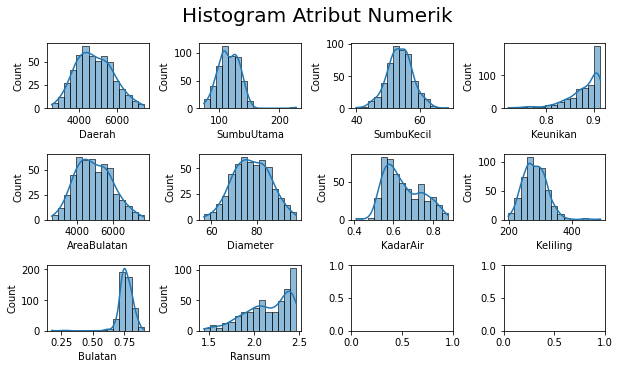

In [24]:
# Visualisasi plot distribusi berupa histogram
# Membuat figure dan axis
fig, ax = plt.subplots(figsize=(10,5), ncols=4, nrows=3)

# Mengatur positioning
left   =  0.125
right  =  0.9
bottom =  0.1
top    =  0.9
wspace =  .5
hspace =  .7

plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace,
)

y_title_margin = .2

# Title
plt.suptitle("Histogram Atribut Numerik", y = 1, fontsize=20)

# Memplot setiap atribut numerik pada kotak tertentu 
sns.histplot(df['Daerah'], kde=True, ax=ax[0][0], bins=15)
sns.histplot(df['SumbuUtama'],  kde=True, ax=ax[0][1], bins=15)
sns.histplot(df['SumbuKecil'],  kde=True, ax=ax[0][2], bins=15)
sns.histplot(df['Keunikan'], kde=True, ax=ax[0][3], bins=15)
sns.histplot(df['AreaBulatan'],  kde=True, ax=ax[1][0], bins=15)
sns.histplot(df['Diameter'],  kde=True, ax=ax[1][1], bins=15)
sns.histplot(df['KadarAir'], kde=True, ax=ax[1][2], bins=15)
sns.histplot(df['Keliling'], kde=True, ax=ax[1][3], bins=15)
sns.histplot(df['Bulatan'], kde=True, ax=ax[2][0], bins=15)
sns.histplot(df['Ransum'], kde=True, ax=ax[2][1], bins=15)

plt.show()

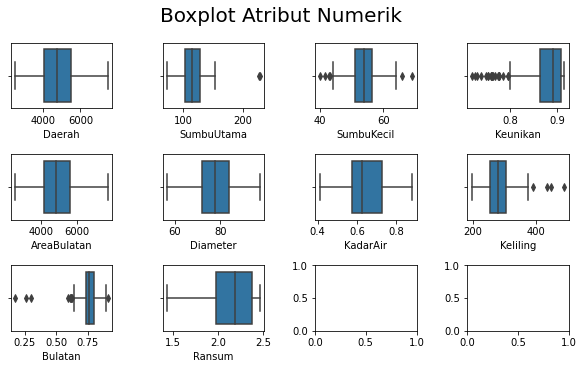

In [25]:
# Visualisasi plot distribusi berupa boxplot
# Membuat figure dan axis
fig, ax = plt.subplots(figsize=(10,5), ncols=4, nrows=3)

# Mengatur positioning
left   =  0.125
right  =  0.9
bottom =  0.1
top    =  0.9
wspace =  .5
hspace =  .7

plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace,
)

y_title_margin = .2

# Title
plt.suptitle("Boxplot Atribut Numerik", y = 1, fontsize=20)

# Memplot setiap atribut numerik pada kotak tertentu 
sns.boxplot(df['Daerah'], ax=ax[0][0])
sns.boxplot(df['SumbuUtama'], ax=ax[0][1])
sns.boxplot(df['SumbuKecil'], ax=ax[0][2])
sns.boxplot(df['Keunikan'], ax=ax[0][3])
sns.boxplot(df['AreaBulatan'], ax=ax[1][0])
sns.boxplot(df['Diameter'], ax=ax[1][1])
sns.boxplot(df['KadarAir'], ax=ax[1][2])
sns.boxplot(df['Keliling'], ax=ax[1][3])
sns.boxplot(df['Bulatan'], ax=ax[2][0])
sns.boxplot(df['Ransum'], ax=ax[2][1])

plt.show()

Dari histogram dan boxplot yang telah digambarkan, dapat dilihat bahwa:
* Atribut **Daerah**, **SumbuKecil**, **AreaBulatan**, dan **Diameter** memiliki distribusi normal
* Atribut **Keunikan** dan **Bulatan** memiliki distribusi data yang *negatively skewed*
* Atribut **SumbuUtama** dan **Keliling** memiliki distribusi data yang *positively skewed*
* Atribut **Ransum** memiliki distribusi data bimodal yang *negatively skewed*
* Atribut **KadarAir** memiliki distribusi data bimodal yang *positively skewed*

Boxplot yang telah digambarkan dapat digunakan untuk menganalisis data pencilan atau *outlier* :
* Atribut **SumbuUtama**, **SumbuKecil**, **Keunikan**, **Keliling**, dan **Bulatan** memiliki data pencilan
* Secara visual, atribut **Keunikan** memiliki data pencilan terbanyak di antara atribut-atribut lainnya
* Atribut **Daerah**, **AreaBulatan**, **Diameter**, **KadarAir**, dan **Ransum** tidak memiliki data pencilan

## Soal 3
> Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test
yang dikaitkan dengan histogram plot.

Untuk lebih memvalidasi distribusi masing-masing atribut, dapat digunakan normality test secara statistik, dengan mengambil hipotesis:
* H0 : Distribusi atribut normal
* H1 : Distributi atribut non-normal
<br/>Kedua hipotesis ini akan dievaluasi berdasarkan nilai p-value

Pada tugas ini, akan digunakan 2 macam normality test yaitu **Shapiro-Wilk** dan **D'Agostino and Pearson's** test

In [26]:
# Fungsi Pembantu
def normality_test(data, att_name, test_type):
  from scipy.stats import shapiro
  from scipy.stats import normaltest

  # Normality test
  if (test_type == "shapiro-wilk"):
    stat, p = shapiro(data)
  else:
    stat, p = normaltest(data)

  # Interpret
  alpha = 0.05

  if p > alpha:
    print(f'{att_name} memiliki distribusi normal')
  else:
    print(f'{att_name} tidak memiliki distribusi normal')

In [27]:
# Shapiro-Wilk Test
for col in num_cols:
  if (col != "id"):
    normality_test(df[col], col, "shapiro-wilk")

Daerah tidak memiliki distribusi normal
SumbuUtama tidak memiliki distribusi normal
SumbuKecil memiliki distribusi normal
Keunikan tidak memiliki distribusi normal
AreaBulatan tidak memiliki distribusi normal
Diameter memiliki distribusi normal
KadarAir tidak memiliki distribusi normal
Keliling tidak memiliki distribusi normal
Bulatan tidak memiliki distribusi normal
Ransum tidak memiliki distribusi normal


In [28]:
# D'Agostino and Pearson's Test
for col in num_cols:
  if (col != "id"):
    normality_test(df[col], col, "dagostino-pearson")

Daerah tidak memiliki distribusi normal
SumbuUtama tidak memiliki distribusi normal
SumbuKecil memiliki distribusi normal
Keunikan tidak memiliki distribusi normal
AreaBulatan tidak memiliki distribusi normal
Diameter tidak memiliki distribusi normal
KadarAir tidak memiliki distribusi normal
Keliling tidak memiliki distribusi normal
Bulatan tidak memiliki distribusi normal
Ransum tidak memiliki distribusi normal


Jika dikaitkan dengan **histogram**, berdasarkan hasil visualisasi didapatkan bahwa atribut numerik:
* Atribut **Daerah**, **SumbuKecil**, **AreaBulatan**, dan **Diameter** memiliki distribusi normal
* Atribut **Keunikan** dan **Bulatan** memiliki distribusi data yang *negatively skewed*
* Atribut **SumbuUtama** dan **Keliling** memiliki distribusi data yang *positively skewed*
* Atribut **Ransum** memiliki distribusi data bimodal yang *negatively skewed*
* Atribut **KadarAir** memiliki distribusi data bimodal yang *positively skewed*

Namun, hasil normality test secara statistika ternyata menunjukkan bahwa:
* Berdasarkan Shapiro-Wilk test: Hanya atribut **SumbuKecil** dan **Diameter** yang berdistribusi normal
* Berdasarkan D'Agostino and Pearson's test: Hanya atribut **SumbuKecil** yang berdistribusi normal

Jadi, dapat disimpulkan bahwa berdasarkan hasil histogram dan normality test, atribut numerik yang dapat **dipastikan** berdistribusi normal adalah atribut **SumbuKecil**, sedangkan atribut lainnya perlu untuk dilakukan pengujian lebih lanjut.

## Soal 4
> Melakukan test hipotesis 1 sampel, dengan menuliskan 6 langkah testing dan menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian

#### Fungsi Bantuan

##### Z-value dan P-value

In [29]:
def get_z_value(data, expc_val):
  """ Menghitung nilai Z-test dari sebuah kumpulan data """
  return (np.mean(data) - expc_val) / (np.std(data)/np.sqrt(data.shape[0]))

def get_p_value(data, expc_val, side="one"):
  """ Menghitung p-value dari z-score sebuah kumpulan data """
  z_score = (np.mean(data) - expc_val) / (np.std(data)/np.sqrt(data.shape[0]))

  if (side == "one"):
    # one-sided
    p_value = stats.norm.sf(abs(z_score))
  else:
    # two-sided
    p_value = stats.norm.sf(abs(z_score)) * 2
  
  return p_value

def get_z_value_proportion(data, phat, po):
  """ Menghitung nilai Z-test proporsi dari sebuah kumpulan data """
  return (phat - po) / np.sqrt((po * (1-po)) / 500)

def get_p_value_proportion(data, phat, po, side="one"):
  """ Menghitung p-value dari z-score sebuah kumpulan data untuk pengujian proposi """
  z_score = (phat - po) / np.sqrt((po * (1-po)) / 500)

  if (side == "one"):
    # one-sided
    p_value = stats.norm.sf(abs(z_score))
  else:
    # two-sided
    p_value = stats.norm.sf(abs(z_score)) * 2

  return p_value

##### Z Test (Mean)

In [30]:
def one_sample_one_sided_mean_ztest(data, att_name, expc_val, tail="left"):
  # 1. Tentukan Hipotesis nol (H0: θ = θ0)
  # 2. Pilih hipotesis alternatif H1

  # 3. Tentukan tingkat signifikan α.
  alpha = 0.05
  print("Tingkat signifikan α: 5% = 0.05\n")

  # 4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
  print(f"Karena atribut {att_name} memiliki distribusi normal, testing ini berjenis 1 sampel dan simpangan baku populasi diketahui maka dapat digunakan z-test")
  if (tail == "left"):
    print(f"Jenis z-test yang akan digunakan adalah one-sided {tail}-tailed karena H1 memiliki simbol daerah ' < ' \n")
  else:
    print(f"Jenis z-test yang akan digunakan adalah one-sided {tail}-tailed karena H1 memiliki simbol daerah ' > ' \n")

  critical_zone = -1 * stats.norm.ppf(alpha)

  if (tail == "left"):
    print(f"Daerah kritis z < -z{alpha} = {-1 * critical_zone}")
  else:
    print(f"Daerah kritis z > z{alpha} = {critical_zone}")

  # 5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan.
  print()
  z_value = get_z_value(data, expc_val)
  p_value = get_p_value(data, expc_val, "one")
  print(f"Rata-rata data: {np.mean(data)}")
  print(f"Standar Deviasi data: {np.std(data)}")
  print(f"Nilai z-test data: {z_value}")
  print(f"Nilai p-value data: {p_value}")

  # 6. Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan
  print("\nBerdasarkan pengujian daerah kritis: ")
  if (tail == "left"):
    if (z_value < critical_zone):
      print(f"z < -z0.05 = {z_value} < {critical_zone}")
      print("Keputusan test hipotesis: ", end="")
      print("H0 ditolak karena nilai uji terletak di daerah kritis")
    else:
      print(f"z > -z0.05 = {z_value} > {critical_zone}")
      print("Keputusan test hipotesis: ", end="")
      print("H0 tidak berhasil ditolak (H0 diterima) karena nilai uji tidak terletak di daerah kritis")
  else:
    if (z_value > critical_zone):
      print(f"z > z0.05 = {z_value} > {critical_zone}")
      print("Keputusan test hipotesis: ", end="")
      print("H0 ditolak karena nilai uji terletak di daerah kritis")
    else:
      print(f"z < z0.05 = {z_value} < {critical_zone}")
      print("Keputusan test hipotesis: ", end="")
      print("H0 tidak berhasil ditolak (H0 diterima) karena nilai uji tidak terletak di daerah kritis")
  
  print("\nBerdasarkan pengujian p-value:")
  if (p_value < alpha):
    print("Keputusan test hipotesis: ", end="")
    print("H0 ditolak karena p-value lebih kecil dibanding tingkat signifikansi alpha")
  else:
    print("Keputusan test hipotesis: ", end="")
    print("H0 tidak berhasil ditolak (H0 diterima) karena p-value lebih besar dibanding tingkat signifikansi alpha")

def one_sample_two_sided_mean_ztest(data, att_name, expc_val):
  # 1. Tentukan Hipotesis nol (H0: θ = θ0)
  # 2. Pilih hipotesis alternatif H1

  # 3. Tentukan tingkat signifikan α.
  alpha = 0.05
  print("Tingkat signifikan α: 5% = 0.05\n")

  # 4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
  print(f"Karena atribut {att_name} memiliki distribusi normal, testing ini berjenis 1 sampel dan simpangan baku populasi diketahui maka dapat digunakan z-test")
  print("Jenis z-test yang akan digunakan adalah two-sided karena H1 memiliki simbol daerah ' = ' \n")

  critical_zone = -1 * stats.norm.ppf(alpha/2)
  print(f"Daerah kritis z < -z{alpha}/2 = {-1 * critical_zone} atau z > z{alpha}/2 = {critical_zone}")

  # 5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan.
  print()
  z_value = get_z_value(data, expc_val)
  p_value = get_p_value(data, expc_val, "two")
  print(f"Rata-rata data: {np.mean(data)}")
  print(f"Standar Deviasi data: {np.std(data)}")
  print(f"Nilai z-test data: {z_value}")
  print(f"Nilai p-value data: {p_value}")

  # 6. Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan
  print("\nBerdasarkan pengujian daerah kritis: ")
  if (z_value < -1 * critical_zone or z_value > critical_zone):
    print("Keputusan test hipotesis: ", end="")
    print("H0 ditolak karena nilai uji terletak di daerah kritis")
  else:
    print("Keputusan test hipotesis: ", end="")
    print("H0 tidak berhasil ditolak (H0 diterima) karena nilai uji tidak terletak di daerah kritis")

  print("\nBerdasarkan pengujian p-value:")
  if (p_value < alpha):
    print("Keputusan test hipotesis: ", end="")
    print("H0 ditolak karena p-value lebih kecil dibanding tingkat signifikansi alpha")
  else:
    print("Keputusan test hipotesis: ", end="")
    print("H0 tidak berhasil ditolak (H0 diterima) karena p-value lebih besar dibanding tingkat signifikansi alpha")

##### Z Test (Proportion)

In [31]:
def one_sample_one_sided_proportion_ztest(data, att_name, phat, po, tail="left"):
  # 1. Tentukan Hipotesis nol (H0: θ = θ0)
  # 2. Pilih hipotesis alternatif H1

  # 3. Tentukan tingkat signifikan α.
  alpha = 0.05
  print("Tingkat signifikan α: 5% = 0.05\n")

  # 4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
  print(f"Karena atribut {att_name} memiliki distribusi normal, testing ini berjenis 1 sampel dan simpangan baku populasi diketahui maka dapat digunakan z-test")
  if (tail == "left"):
    print(f"Jenis z-test yang akan digunakan adalah one-sided {tail}-tailed karena H1 memiliki simbol daerah ' < ' \n")
  else:
    print(f"Jenis z-test yang akan digunakan adalah one-sided {tail}-tailed karena H1 memiliki simbol daerah ' > ' \n")

  critical_zone = -1 * stats.norm.ppf(alpha)

  if (tail == "left"):
    print(f"Daerah kritis z < -z{alpha} = {-1 * critical_zone}")
  else:
    print(f"Daerah kritis z > z{alpha} = {critical_zone}")

  # 5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan.
  print()
  z_value = get_z_value_proportion(data, phat, po)
  p_value = get_p_value_proportion(data, phat, po, "one")
  print(f"Rata-rata data: {np.mean(data)}")
  print(f"Standar Deviasi data: {np.std(data)}")
  print(f"Nilai z-test data: {z_value}")
  print(f"Nilai p-value data: {p_value}")

  # 6. Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan
  print("\nBerdasarkan pengujian daerah kritis: ")
  if (tail == "left"):
    if (z_value < critical_zone):
      print(f"z < -z0.05 = {z_value} < {critical_zone}")
      print("Keputusan test hipotesis: ", end="")
      print("H0 ditolak karena nilai uji terletak di daerah kritis")
    else:
      print(f"z > -z0.05 = {z_value} > {critical_zone}")
      print("Keputusan test hipotesis: ", end="")
      print("H0 tidak berhasil ditolak (H0 diterima) karena nilai uji tidak terletak di daerah kritis")
  else:
    if (z_value > critical_zone):
      print(f"z > z0.05 = {z_value} > {critical_zone}")
      print("Keputusan test hipotesis: ", end="")
      print("H0 ditolak karena nilai uji terletak di daerah kritis")
    else:
      print(f"z < z0.05 = {z_value} < {critical_zone}")
      print("Keputusan test hipotesis: ", end="")
      print("H0 tidak berhasil ditolak (H0 diterima) karena nilai uji tidak terletak di daerah kritis")

  print("\nBerdasarkan pengujian p-value:")
  if (p_value < alpha):
    print("Keputusan test hipotesis: ", end="")
    print("H0 ditolak karena p-value lebih kecil dibanding tingkat signifikansi alpha")
  else:
    print("Keputusan test hipotesis: ", end="")
    print("H0 tidak berhasil ditolak (H0 diterima) karena p-value lebih besar dibanding tingkat signifikansi alpha")

def one_sample_two_sided_proportion_ztest(data, att_name, phat, po):
  # 1. Tentukan Hipotesis nol (H0: θ = θ0)
  # 2. Pilih hipotesis alternatif H1

  # 3. Tentukan tingkat signifikan α.
  alpha = 0.05
  print("Tingkat signifikan α: 5% = 0.05\n")

  # 4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
  print(f"Karena atribut {att_name} memiliki distribusi normal, testing ini berjenis 1 sampel dan simpangan baku populasi diketahui maka dapat digunakan z-test")
  print("Jenis z-test yang akan digunakan adalah two-sided karena H1 memiliki simbol daerah ' = ' \n")

  critical_zone = -1 * stats.norm.ppf(alpha/2)
  print(f"Daerah kritis z < -z{alpha}/2 = {-1 * critical_zone} atau z > z{alpha}/2 = {critical_zone}")

  # 5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan.
  print()
  z_value = get_z_value_proportion(data, phat, po)
  p_value = get_p_value_proportion(data, phat, po, "two")
  print(f"Rata-rata data: {np.mean(data)}")
  print(f"Standar Deviasi data: {np.std(data)}")
  print(f"Nilai z-test data: {z_value}")
  print(f"Nilai p-value data: {p_value}")

  # 6. Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan
  print("\nBerdasarkan pengujian daerah kritis: ")
  if (z_value < -1 * critical_zone or z_value > critical_zone):
    print("Keputusan test hipotesis: ", end="")
    print("H0 ditolak karena nilai uji terletak di daerah kritis")
  else:
    print("Keputusan test hipotesis: ", end="")
    print("H0 tidak berhasil ditolak (H0 diterima) karena nilai uji tidak terletak di daerah kritis")
  
  print("\nBerdasarkan pengujian p-value:")
  if (p_value < alpha):
    print("Keputusan test hipotesis: ", end="")
    print("H0 ditolak karena p-value lebih kecil dibanding tingkat signifikansi alpha")
  else:
    print("Keputusan test hipotesis: ", end="")
    print("H0 tidak berhasil ditolak (H0 diterima) karena p-value lebih besar dibanding tingkat signifikansi alpha")

#### a. Nilai rata-rata Daerah di atas 4700?

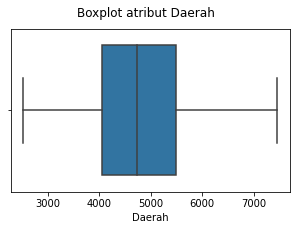

In [32]:
# Boxplot untuk atribut terkait
plt.figure(figsize=(5,3))
sns.boxplot(df['Daerah'])
plt.suptitle('Boxplot atribut Daerah')
plt.show()

In [33]:
# Langkah testing hipotesis:
print("Nilai rata-rata Daerah di atas 4700?\n")
print("Perhatikan bahwa agar original claim dapat dijadikan H0, ia harus memiliki tanda equality seperti '='")
print("Namun, karena original claim tersebut tidak mengandung equality, H0 akan dibentuk dari komplemennya")

# 1. Tentukan Hipotesis nol (H0: θ = θ0)
print("H0: μ <= 4700")

# 2. Pilih hipotesis alternatif H1
print("H1: μ > 4700")

# Langkah 3 4 5 6
one_sample_one_sided_mean_ztest(df.Daerah, "Daerah", 4700, tail="right")

# Kesimpulan
print("\nKesimpulan:\n     Hasil pengujian hipotesis menyatakan BENAR bahwa 'Nilai rata-rata Daerah di atas 4700'")

Nilai rata-rata Daerah di atas 4700?

Perhatikan bahwa agar original claim dapat dijadikan H0, ia harus memiliki tanda equality seperti '='
Namun, karena original claim tersebut tidak mengandung equality, H0 akan dibentuk dari komplemennya
H0: μ <= 4700
H1: μ > 4700
Tingkat signifikan α: 5% = 0.05

Karena atribut Daerah memiliki distribusi normal, testing ini berjenis 1 sampel dan simpangan baku populasi diketahui maka dapat digunakan z-test
Jenis z-test yang akan digunakan adalah one-sided right-tailed karena H1 memiliki simbol daerah ' > ' 

Daerah kritis z > z0.05 = 1.6448536269514729

Rata-rata data: 4801.246
Standar Deviasi data: 985.4086022985593
Nilai z-test data: 2.29745242655545
Nilai p-value data: 0.010796486989025375

Berdasarkan pengujian daerah kritis: 
z > z0.05 = 2.29745242655545 > 1.6448536269514729
Keputusan test hipotesis: H0 ditolak karena nilai uji terletak di daerah kritis

Berdasarkan pengujian p-value:
Keputusan test hipotesis: H0 ditolak karena p-value lebih kec

#### b. Nilai Rata-rata Sumbu Utama tidak sama dengan 116?

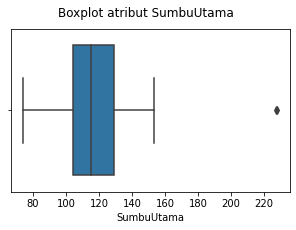

In [34]:
# Boxplot untuk atribut terkait
plt.figure(figsize=(5,3))
sns.boxplot(df['SumbuUtama'])
plt.suptitle('Boxplot atribut SumbuUtama')
plt.show()

In [35]:
# Langkah testing hipotesis:
print("Nilai Rata-rata Sumbu Utama tidak sama dengan 116?\n")
print("Perhatikan bahwa agar original claim dapat dijadikan H0, ia harus memiliki tanda equality seperti '='")
print("Namun, karena original claim tersebut tidak mengandung equality, H0 akan dibentuk dari komplemennya")

# 1. Tentukan Hipotesis nol (H0: θ = θ0)
print("H0: μ = 116")

# 2. Pilih hipotesis alternatif H1
print("H1: μ != 116")

# Langkah 3 4 5 6
one_sample_two_sided_mean_ztest(df.SumbuUtama, "Sumbu Utama", 116)

# Kesimpulan
print("\nKesimpulan:\n     Hasil pengujian hipotesis menyatakan TIDAK BENAR bahwa 'Nilai Rata-rata Sumbu Utama tidak sama dengan 116'")
print("     Hasil yang BENAR adalah nilai rata-rata sumbu utama sama dengan 116")

Nilai Rata-rata Sumbu Utama tidak sama dengan 116?

Perhatikan bahwa agar original claim dapat dijadikan H0, ia harus memiliki tanda equality seperti '='
Namun, karena original claim tersebut tidak mengandung equality, H0 akan dibentuk dari komplemennya
H0: μ = 116
H1: μ != 116
Tingkat signifikan α: 5% = 0.05

Karena atribut Sumbu Utama memiliki distribusi normal, testing ini berjenis 1 sampel dan simpangan baku populasi diketahui maka dapat digunakan z-test
Jenis z-test yang akan digunakan adalah two-sided karena H1 memiliki simbol daerah ' = ' 

Daerah kritis z < -z0.05/2 = -1.9599639845400545 atau z > z0.05/2 = 1.9599639845400545

Rata-rata data: 116.04517136778003
Standar Deviasi data: 18.264334181136068
Nilai z-test data: 0.055302453399647976
Nilai p-value data: 0.9558975076292265

Berdasarkan pengujian daerah kritis: 
Keputusan test hipotesis: H0 tidak berhasil ditolak (H0 diterima) karena nilai uji tidak terletak di daerah kritis

Berdasarkan pengujian p-value:
Keputusan test hi

#### c. Nilai Rata-rata 20 baris pertama kolom Sumbu Kecil bukan 50?

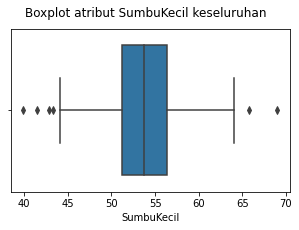

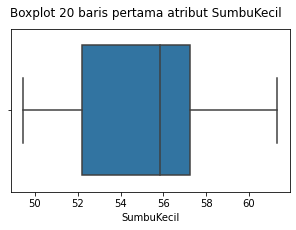

In [36]:
# Boxplot untuk atribut terkait [Seluruh atribut]
plt.figure(figsize=(5,3))
sns.boxplot(df['SumbuKecil'])
plt.suptitle('Boxplot atribut SumbuKecil keseluruhan')
plt.show()

# Boxplot untuk atribut terkait [20 baris pertama]
plt.figure(figsize=(5,3))
sns.boxplot(df['SumbuKecil'].iloc[:20])
plt.suptitle('Boxplot 20 baris pertama atribut SumbuKecil')
plt.show()

In [37]:
# Langkah testing hipotesis:
print("Nilai Rata-rata 20 baris pertama kolom Sumbu Kecil bukan 50?\n")
print("Perhatikan bahwa agar original claim dapat dijadikan H0, ia harus memiliki tanda equality seperti '='")
print("Namun, karena original claim tersebut tidak mengandung equality, H0 akan dibentuk dari komplemennya")

# 1. Tentukan Hipotesis nol (H0: θ = θ0)
print("H0: μ = 50 (Untuk 20 baris pertama)")

# 2. Pilih hipotesis alternatif H1
print("H1: μ != 50 (Untuk 20 baris pertama)")

# Langkah 3 4 5 6
one_sample_two_sided_mean_ztest(df.SumbuKecil.iloc[:20], "Sumbu Kecil", 50)

# Kesimpulan
print("\nKesimpulan:\n     Hasil pengujian hipotesis menyatakan BENAR bahwa 'Nilai Rata-rata 20 baris pertama kolom Sumbu Kecil bukan 50'")

Nilai Rata-rata 20 baris pertama kolom Sumbu Kecil bukan 50?

Perhatikan bahwa agar original claim dapat dijadikan H0, ia harus memiliki tanda equality seperti '='
Namun, karena original claim tersebut tidak mengandung equality, H0 akan dibentuk dari komplemennya
H0: μ = 50 (Untuk 20 baris pertama)
H1: μ != 50 (Untuk 20 baris pertama)
Tingkat signifikan α: 5% = 0.05

Karena atribut Sumbu Kecil memiliki distribusi normal, testing ini berjenis 1 sampel dan simpangan baku populasi diketahui maka dapat digunakan z-test
Jenis z-test yang akan digunakan adalah two-sided karena H1 memiliki simbol daerah ' = ' 

Daerah kritis z < -z0.05/2 = -1.9599639845400545 atau z > z0.05/2 = 1.9599639845400545

Rata-rata data: 54.887276260499995
Standar Deviasi data: 3.2884513512581446
Nilai z-test data: 6.6464610699610045
Nilai p-value data: 3.002238088445661e-11

Berdasarkan pengujian daerah kritis: 
Keputusan test hipotesis: H0 ditolak karena nilai uji terletak di daerah kritis

Berdasarkan pengujian p-

#### d. Proporsi nilai Diameter yang lebih dari 85, adalah tidak sama dengan 15%?

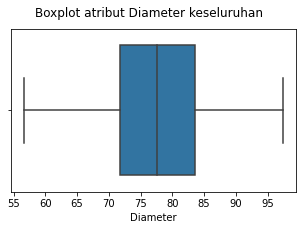

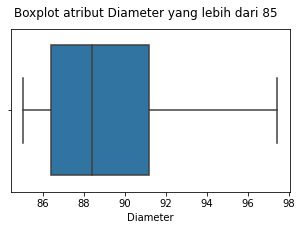

In [38]:
# Boxplot untuk atribut terkait [Seluruh atribut]
plt.figure(figsize=(5.1,3))
sns.boxplot(df['Diameter'])
plt.suptitle('Boxplot atribut Diameter keseluruhan')
plt.show()

# Boxplot untuk atribut terkait [Diameter yang lebih dari 85]
plt.figure(figsize=(5,3))
sns.boxplot(df['Diameter'][df['Diameter'] > 85])
plt.suptitle('Boxplot atribut Diameter yang lebih dari 85')
plt.show()

In [39]:
# Langkah testing hipotesis:
print("Proporsi nilai Diameter yang lebih dari 85, adalah tidak sama dengan 15%?\n")
print("Perhatikan bahwa agar original claim dapat dijadikan H0, ia harus memiliki tanda equality seperti '='")
print("Namun, karena original claim tersebut tidak mengandung equality, H0 akan dibentuk dari komplemennya")

# 1. Tentukan Hipotesis nol (H0: θ = θ0)
print("H0: π = 15% (Untuk Diameter yang > 86)")

# 2. Pilih hipotesis alternatif H1
print("H1: π != 15% (Untuk Diameter yang > 86)\n")

# Langkah 3 4 5 6
data = df.Diameter[df.Diameter > 85]
phat = data.shape[0] / df.Diameter.shape[0]
po = 0.15

# Tentukan Phat dan P0
# Phat : observed proportion
# P0   : hypothesized probability
print(f"P hat = {phat}")
print(f"P0 = {po}\n")

one_sample_two_sided_proportion_ztest(data, "Diameter", phat, po)

# Kesimpulan
print("\nKesimpulan:\n     Hasil pengujian hipotesis menyatakan BENAR bahwa 'Proporsi nilai Diameter yang lebih dari 85, adalah tidak sama dengan 15%'")

Proporsi nilai Diameter yang lebih dari 85, adalah tidak sama dengan 15%?

Perhatikan bahwa agar original claim dapat dijadikan H0, ia harus memiliki tanda equality seperti '='
Namun, karena original claim tersebut tidak mengandung equality, H0 akan dibentuk dari komplemennya
H0: π = 15% (Untuk Diameter yang > 86)
H1: π != 15% (Untuk Diameter yang > 86)

P hat = 0.194
P0 = 0.15

Tingkat signifikan α: 5% = 0.05

Karena atribut Diameter memiliki distribusi normal, testing ini berjenis 1 sampel dan simpangan baku populasi diketahui maka dapat digunakan z-test
Jenis z-test yang akan digunakan adalah two-sided karena H1 memiliki simbol daerah ' = ' 

Daerah kritis z < -z0.05/2 = -1.9599639845400545 atau z > z0.05/2 = 1.9599639845400545

Rata-rata data: 89.17190935680412
Standar Deviasi data: 3.183449014734056
Nilai z-test data: 2.755386880774658
Nilai p-value data: 0.005862277168409654

Berdasarkan pengujian daerah kritis: 
Keputusan test hipotesis: H0 ditolak karena nilai uji terletak di d

Hasil pengujian hipotesis menyatakan BENAR bahwa "Proporsi nilai Diameter yang lebih dari 85, adalah tidak sama dengan 15%"

#### e. Proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5% ?

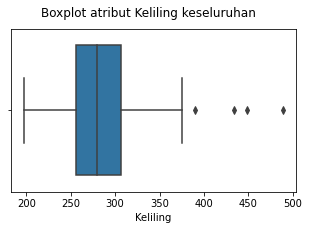

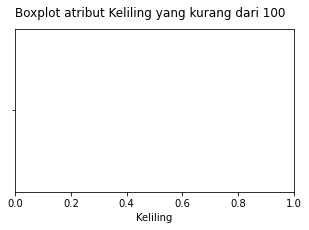

In [40]:
# Boxplot untuk atribut terkait [Seluruh atribut]
plt.figure(figsize=(5.11,3))
sns.boxplot(df['Keliling'])
plt.suptitle('Boxplot atribut Keliling keseluruhan')
plt.show()

# Boxplot untuk atribut terkait [Keliling yang kurang dari 100]
plt.figure(figsize=(5,3))
sns.boxplot(df['Keliling'][df['Keliling'] < 100])
plt.suptitle('Boxplot atribut Keliling yang kurang dari 100')
plt.show()

In [41]:
# Langkah testing hipotesis:
print("Proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5% ?\n")
print("Perhatikan bahwa agar original claim dapat dijadikan H0, ia harus memiliki tanda equality seperti '='")
print("Namun, karena original claim tersebut tidak mengandung equality, H0 akan dibentuk dari komplemennya")

# 1. Tentukan Hipotesis nol (H0: θ = θ0)
print("H0: π >= 5% (Untuk Keliling yang kurang dari 100)")

# 2. Pilih hipotesis alternatif H1
print("H1: π < 5% (Untuk Keliling yang kurang dari 100)\n")

# Langkah 3 4 5 6
data = df.Keliling[df.Keliling < 100]
phat = data.shape[0] / df.Keliling.shape[0]
po = 0.05

# Tentukan Phat dan P0
# Phat : observed proportion
# P0   : hypothesized probability
print(f"P hat = {phat}")
print(f"P0 = {po}\n")

one_sample_one_sided_proportion_ztest(data, "Keliling", phat, po, "left")

# Kesimpulan
print("\nKesimpulan:\n     Hasil pengujian hipotesis menyatakan BENAR bahwa 'Proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5%'")

Proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5% ?

Perhatikan bahwa agar original claim dapat dijadikan H0, ia harus memiliki tanda equality seperti '='
Namun, karena original claim tersebut tidak mengandung equality, H0 akan dibentuk dari komplemennya
H0: π >= 5% (Untuk Keliling yang kurang dari 100)
H1: π < 5% (Untuk Keliling yang kurang dari 100)

P hat = 0.0
P0 = 0.05

Tingkat signifikan α: 5% = 0.05

Karena atribut Keliling memiliki distribusi normal, testing ini berjenis 1 sampel dan simpangan baku populasi diketahui maka dapat digunakan z-test
Jenis z-test yang akan digunakan adalah one-sided left-tailed karena H1 memiliki simbol daerah ' < ' 

Daerah kritis z < -z0.05 = -1.6448536269514729

Rata-rata data: nan
Standar Deviasi data: nan
Nilai z-test data: -5.129891760425771
Nilai p-value data: 1.4495441414387716e-07

Berdasarkan pengujian daerah kritis: 
z < -z0.05 = -5.129891760425771 < 1.6448536269514729
Keputusan test hipotesis: H0 ditolak karena nilai uji

## Soal 5
> Melakukan test hipotesis 2 sampel, dengan menuliskan 6 langkah testing dan menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.


##### a. Data kolom AreaBulatan dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?

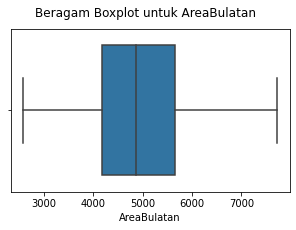

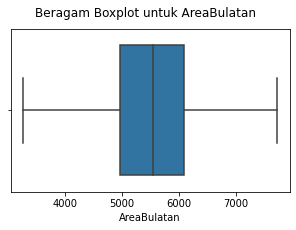

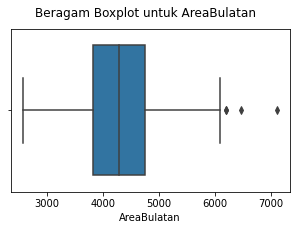

In [42]:
# Boxplot untuk atribut terkait (AreaBulatan: KESELURUHAN)
plt.figure(figsize=(5,3))
sns.boxplot(df['AreaBulatan'])
plt.suptitle('Beragam Boxplot untuk AreaBulatan')
plt.show()

# Boxplot untuk AreaBulatan (250 PERTAMA)
plt.figure(figsize=(5,3))
sns.boxplot(df['AreaBulatan'].iloc[:250])
plt.suptitle('Beragam Boxplot untuk AreaBulatan')
plt.show()

# Boxplot untuk AreaBulatan (250 TERAKHIR)
plt.figure(figsize=(5,3))
sns.boxplot(df['AreaBulatan'].iloc[-250:])
plt.suptitle('Beragam Boxplot untuk AreaBulatan')
plt.show()

In [43]:
# Langkah testing hipotesis:
print("Data kolom AreaBulatan dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?\n")

# 1. Tentukan Hipotesis nol (H0: θ = θ0), dimana θ bisa berupa μ, σ2, p, atau data lain berdistribusi tertentu (normal, binomial, dsc.).
alpha = 0.05; d0 = 0

print(f"H0: μ1 - μ2 = {d0}")

# 2. Pilih hipotesis alternatif H1 salah dari dari θ > θ0, θ < θ0, atau θ ≠ θ0.
print(f"H1: μ1 - μ2 ≠ {d0}")

# 3. Tentukan tingkat signifikan α.
print(f"Tingkat signifikan α: {int(alpha*100)}% = {alpha}\n")

# 4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
print("Perhatikan bahwa kedua pecahan atribut AreaBulatan berdistribusi normal, testing berjenis 2 sampel dan standar deviasi diketahui sehingga dapat digunakan z-test")
print("Jenis z-test yang digunakan adalah two-sided karena H1 memiliki simbol ' ≠ '\n")

n1 = 250; n2 = 250

one_mean = df['AreaBulatan'].iloc[:n1].mean()
two_mean = df['AreaBulatan'].iloc[-n2:].mean()
one_var = df['AreaBulatan'].iloc[:n1].var()
two_var = df['AreaBulatan'].iloc[-n2:].var()
one_std = df['AreaBulatan'].iloc[:n1].std()
two_std = df['AreaBulatan'].iloc[-n2:].std()

z = ((one_mean - two_mean) - d0)/(np.sqrt((one_var/n1) + (two_var/n2)))
critical_zone = -1 * stats.norm.ppf(alpha/2)

print(f"Daerah kritis z < -z{alpha}/2 = {-1 * critical_zone} dan z > z{alpha}/2 = {critical_zone}")

print(f"Rata-rata 1 = {one_mean}")
print(f"Rata-rata 2 = {two_mean}")
print(f"Standar deviasi 1 = {one_std}")
print(f"Standar deviasi 2 = {two_std}\n")

# 5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai denganuji statistik yang digunakan.
p_value = stats.norm.sf(abs(z))

print(f"Nilai z-test data = {z}")
print(f"Nilai p-value data = {p_value}\n")

# 6. Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan
print("Berdasarkan pengujian daerah kritis: ")
if (z < -1 * critical_zone or z > critical_zone):
  print("Keputusan test hipotesis: ", end="")
  print("H0 ditolak karena nilai uji terletak di daerah kritis sehingga μ1 ≠ μ2")
else:
  print("Keputusan test hipotesis: ", end="")
  print("H0 tidak berhasil ditolak (H0 diterima) karena nilai uji tidak terletak di daerah kritis sehingga BENAR, μ1 = μ2")

print("\nBerdasarkan pengujian p-value:")
if (p_value < alpha):
  print("Keputusan test hipotesis: ", end="")
  print("H0 ditolak karena p-value lebih kecil dibanding tingkat signifikansi alpha sehingga μ1 ≠ μ2")
else:
  print("Keputusan test hipotesis: ", end="")
  print("H0 tidak berhasil ditolak (H0 diterima) karena p-value lebih besar dibanding tingkat signifikansi alpha sehingga BENAR, μ1 = μ2")

Data kolom AreaBulatan dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?

H0: μ1 - μ2 = 0
H1: μ1 - μ2 ≠ 0
Tingkat signifikan α: 5% = 0.05

Perhatikan bahwa kedua pecahan atribut AreaBulatan berdistribusi normal, testing berjenis 2 sampel dan standar deviasi diketahui sehingga dapat digunakan z-test
Jenis z-test yang digunakan adalah two-sided karena H1 memiliki simbol ' ≠ '

Daerah kritis z < -z0.05/2 = -1.9599639845400545 dan z > z0.05/2 = 1.9599639845400545
Rata-rata 1 = 5549.804
Rata-rata 2 = 4324.292
Standar deviasi 1 = 867.0254356176825
Standar deviasi 2 = 738.5664658199252

Nilai z-test data = 17.013036648485464
Nilai p-value data = 3.287012297809474e-65

Berdasarkan pengujian daerah kritis: 
Keputusan test hipotesis: H0 ditolak karena nilai uji terletak di daerah kritis sehingga μ1 ≠ μ2

Berdasarkan pengujian p-value:
Keputusan test hipotesis: H0 ditolak karena p-value lebih kecil dibanding tingkat signifikansi alpha sehingga 

##### b. Data kolom Kadar Air dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2?

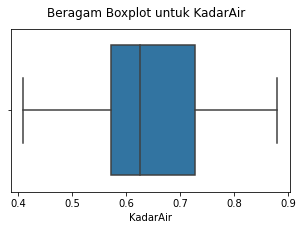

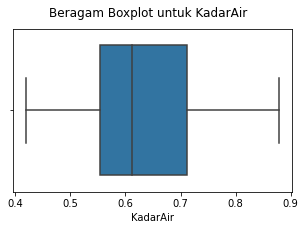

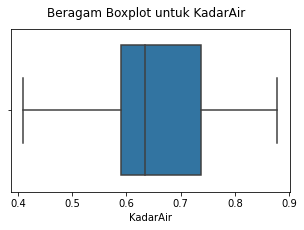

In [44]:
# Boxplot untuk atribut terkait (KadarAir: KESELURUHAN)
plt.figure(figsize=(5,3))
sns.boxplot(df['KadarAir'])
plt.suptitle('Beragam Boxplot untuk KadarAir')
plt.show()

# Boxplot untuk KadarAir (250 PERTAMA)
plt.figure(figsize=(5,3))
sns.boxplot(df['KadarAir'].iloc[:250])
plt.suptitle('Beragam Boxplot untuk KadarAir')
plt.show()

# Boxplot untuk KadarAir (250 TERAKHIR)
plt.figure(figsize=(5,3))
sns.boxplot(df['KadarAir'].iloc[-250:])
plt.suptitle('Beragam Boxplot untuk KadarAir')
plt.show()

In [45]:
# Langkah testing hipotesis:
print("Data kolom Kadar Air dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2?\n")

# 1. Tentukan Hipotesis nol (H0: θ = θ0), dimana θ bisa berupa μ, σ2, p, atau data lain berdistribusi tertentu (normal, binomial, dsc.).
alpha = 0.05; d0 = 0.2

print(f"H0: μ1 - μ2 = {d0}")

# 2. Pilih hipotesis alternatif H1 salah dari dari θ > θ0, θ < θ0, atau θ ≠ θ0.
print(f"H1: μ1 - μ2 ≠ {d0}")

# 3. Tentukan tingkat signifikan α.
print(f"Tingkat signifikan α: {int(alpha*100)}% = {alpha}\n")

# 4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
print("Perhatikan bahwa kedua pecahan atribut KadarAir berdistribusi normal, testing berjenis 2 sampel dan standar deviasi diketahui sehingga dapat digunakan z-test")
print("Jenis z-test yang digunakan adalah two-sided karena H1 memiliki simbol ' ≠ '\n")

n1 = 250; n2 = 250

one_mean = df['KadarAir'].iloc[:n1].mean()
two_mean = df['KadarAir'].iloc[-n2:].mean()
one_var = df['KadarAir'].iloc[:n1].var()
two_var = df['KadarAir'].iloc[-n2:].var()
one_std = df['KadarAir'].iloc[:n1].std()
two_std = df['KadarAir'].iloc[-n2:].std()

z = ((one_mean - two_mean) - d0)/(np.sqrt((one_var/n1) + (two_var/n2)))
critical_zone = -1 * stats.norm.ppf(alpha/2)

print(f"Daerah kritis z < -z{alpha}/2 = {-1 * critical_zone} dan z > z{alpha}/2 = {critical_zone}")

print(f"Rata-rata 1 = {one_mean}")
print(f"Rata-rata 2 = {two_mean}")
print(f"Standar deviasi 1 = {one_std}")
print(f"Standar deviasi 2 = {two_std}\n")

# 5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai denganuji statistik yang digunakan.
p_value = stats.norm.sf(abs(z))

print(f"Nilai z-test data = {z}")
print(f"Nilai p-value data = {p_value}\n")

# 6. Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan
print("Berdasarkan pengujian daerah kritis: ")
if (z < -1 * critical_zone or z > critical_zone):
  print("Keputusan test hipotesis: ", end="")
  print("H0 ditolak karena nilai uji terletak di daerah kritis sehingga μ1 ≠ μ2 + 0.2")
else:
  print("Keputusan test hipotesis: ", end="")
  print("H0 tidak berhasil ditolak (H0 diterima) karena nilai uji tidak terletak di daerah kritis sehingga BENAR, μ1 = μ2 + 0.2")

print("\nBerdasarkan pengujian p-value:")
if (p_value < alpha):
  print("Keputusan test hipotesis: ", end="")
  print("H0 ditolak karena p-value lebih kecil dibanding tingkat signifikansi alpha sehingga μ1 ≠ μ2 + 0.2")
else:
  print("Keputusan test hipotesis: ", end="")
  print("H0 tidak berhasil ditolak (H0 diterima) karena p-value lebih besar dibanding tingkat signifikansi alpha sehingga BENAR, μ1 = μ2 + 0.2")

Data kolom Kadar Air dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2?

H0: μ1 - μ2 = 0.2
H1: μ1 - μ2 ≠ 0.2
Tingkat signifikan α: 5% = 0.05

Perhatikan bahwa kedua pecahan atribut KadarAir berdistribusi normal, testing berjenis 2 sampel dan standar deviasi diketahui sehingga dapat digunakan z-test
Jenis z-test yang digunakan adalah two-sided karena H1 memiliki simbol ' ≠ '

Daerah kritis z < -z0.05/2 = -1.9599639845400545 dan z > z0.05/2 = 1.9599639845400545
Rata-rata 1 = 0.63574344072
Rata-rata 2 = 0.6609999030760001
Standar deviasi 1 = 0.09509574147708488
Standar deviasi 2 = 0.0921012305176788

Nilai z-test data = -26.903444249744958
Nilai p-value data = 1.0008041428008981e-159

Berdasarkan pengujian daerah kritis: 
Keputusan test hipotesis: H0 ditolak karena nilai uji terletak di daerah kritis sehingga μ1 ≠ μ2 + 0.2

Berdasarkan pengujian p-value:
Keputusan test hipotesis: H0 ditolak karena p-value 

##### c. Rata-rata 20 baris pertama kolom Bulatan sama dengan 20 baris terakhirnya?

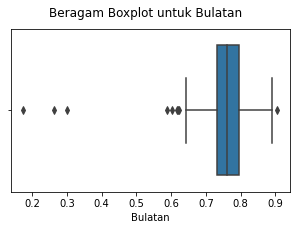

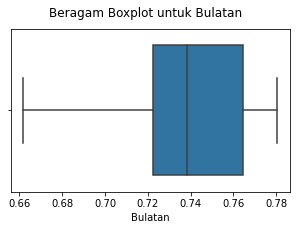

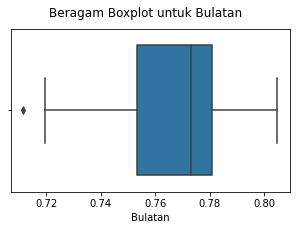

In [46]:
# Boxplot untuk atribut terkait (Bulatan: KESELURUHAN)
plt.figure(figsize=(5,3))
sns.boxplot(df['Bulatan'])
plt.suptitle('Beragam Boxplot untuk Bulatan')
plt.show()

# Boxplot untuk Bulatan (20 PERTAMA)
plt.figure(figsize=(5,3))
sns.boxplot(df['Bulatan'].iloc[:20])
plt.suptitle('Beragam Boxplot untuk Bulatan')
plt.show()

# Boxplot untuk Bulatan (20 TERAKHIR)
plt.figure(figsize=(5,3))
sns.boxplot(df['Bulatan'].iloc[-20:])
plt.suptitle('Beragam Boxplot untuk Bulatan')
plt.show()

In [47]:
# Langkah testing hipotesis:
print("Rata-rata 20 baris pertama kolom Bulatan sama dengan 20 baris terakhirnya?\n")

# 1. Tentukan Hipotesis nol (H0: θ = θ0), dimana θ bisa berupa μ, σ2, p, atau data lain berdistribusi tertentu (normal, binomial, dsc.).
alpha = 0.05; d0 = 0

print(f"H0: μ1 - μ2 = {d0}")

# 2. Pilih hipotesis alternatif H1 salah dari dari θ > θ0, θ < θ0, atau θ ≠ θ0.
print(f"H1: μ1 - μ2 ≠ {d0}")

# 3. Tentukan tingkat signifikan α.
print(f"Tingkat signifikan α: {int(alpha*100)}% = {alpha}\n")

# 4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
print("Perhatikan bahwa kedua pecahan atribut Bulatan berdistribusi normal, testing berjenis 2 sampel dan standar deviasi diketahui sehingga dapat digunakan z-test")
print("Jenis z-test yang digunakan adalah two-sided karena H1 memiliki simbol ' ≠ '\n")

n1 = 20; n2 = 20

one_mean = df['Bulatan'].iloc[:n1].mean()
two_mean = df['Bulatan'].iloc[-n2:].mean()
one_var = df['Bulatan'].iloc[:n1].var()
two_var = df['Bulatan'].iloc[-n2:].var()
one_std = df['Bulatan'].iloc[:n1].std()
two_std = df['Bulatan'].iloc[-n2:].std()

z = ((one_mean - two_mean) - d0)/(np.sqrt((one_var/n1) + (two_var/n2)))
critical_zone = -1 * stats.norm.ppf(alpha/2)

print(f"Daerah kritis z < -z{alpha}/2 = {-1 * critical_zone} dan z > z{alpha}/2 = {critical_zone}")

print(f"Rata-rata 1 = {one_mean}")
print(f"Rata-rata 2 = {two_mean}")
print(f"Standar deviasi 1 = {one_std}")
print(f"Standar deviasi 2 = {two_std}\n")

# 5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai denganuji statistik yang digunakan.
p_value = stats.norm.sf(abs(z))

print(f"Nilai z-test data = {z}")
print(f"Nilai p-value data = {p_value}\n")

# 6. Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan
print("Berdasarkan pengujian daerah kritis: ")
if (z < -1 * critical_zone or z > critical_zone):
  print("Keputusan test hipotesis: ", end="")
  print("H0 ditolak karena nilai uji terletak di daerah kritis sehingga μ1 ≠ μ2")
else:
  print("Keputusan test hipotesis: ", end="")
  print("H0 tidak berhasil ditolak (H0 diterima) karena nilai uji tidak terletak di daerah kritis sehingga BENAR, μ1 = μ2")

print("\nBerdasarkan pengujian p-value:")
if (p_value < alpha):
  print("Keputusan test hipotesis: ", end="")
  print("H0 ditolak karena p-value lebih kecil dibanding tingkat signifikansi alpha sehingga μ1 ≠ μ2")
else:
  print("Keputusan test hipotesis: ", end="")
  print("H0 tidak berhasil ditolak (H0 diterima) karena p-value lebih besar dibanding tingkat signifikansi alpha sehingga BENAR, μ1 = μ2")

Rata-rata 20 baris pertama kolom Bulatan sama dengan 20 baris terakhirnya?

H0: μ1 - μ2 = 0
H1: μ1 - μ2 ≠ 0
Tingkat signifikan α: 5% = 0.05

Perhatikan bahwa kedua pecahan atribut Bulatan berdistribusi normal, testing berjenis 2 sampel dan standar deviasi diketahui sehingga dapat digunakan z-test
Jenis z-test yang digunakan adalah two-sided karena H1 memiliki simbol ' ≠ '

Daerah kritis z < -z0.05/2 = -1.9599639845400545 dan z > z0.05/2 = 1.9599639845400545
Rata-rata 1 = 0.7375353552499999
Rata-rata 2 = 0.767322437
Standar deviasi 1 = 0.03038477583561706
Standar deviasi 2 = 0.025115057347653767

Nilai z-test data = -3.3792268633124025
Nilai p-value data = 0.0003634499872927443

Berdasarkan pengujian daerah kritis: 
Keputusan test hipotesis: H0 ditolak karena nilai uji terletak di daerah kritis sehingga μ1 ≠ μ2

Berdasarkan pengujian p-value:
Keputusan test hipotesis: H0 ditolak karena p-value lebih kecil dibanding tingkat signifikansi alpha sehingga μ1 ≠ μ2


##### d. Proporsi nilai bagian awal Ransum yang lebih dari 2, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Ransum?

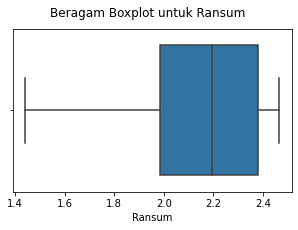

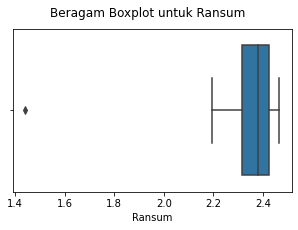

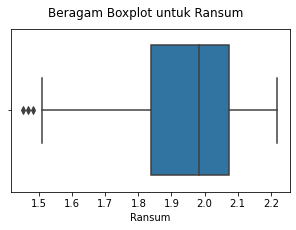

In [48]:
# Boxplot untuk atribut terkait (Ransum: KESELURUHAN)
plt.figure(figsize=(5,3))
sns.boxplot(df['Ransum'])
plt.suptitle('Beragam Boxplot untuk Ransum')
plt.show()

# Boxplot untuk Ransum (250 PERTAMA)
plt.figure(figsize=(5,3))
sns.boxplot(df['Ransum'].iloc[:250])
plt.suptitle('Beragam Boxplot untuk Ransum')
plt.show()

# Boxplot untuk Ransum (250 TERAKHIR)
plt.figure(figsize=(5,3))
sns.boxplot(df['Ransum'].iloc[-250:])
plt.suptitle('Beragam Boxplot untuk Ransum')
plt.show()

In [49]:
# Langkah testing hipotesis:
print("Proporsi nilai bagian awal Ransum yang lebih dari 2, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Ransum?\n")

# 1. Tentukan Hipotesis nol (H0: θ = θ0), dimana θ bisa berupa μ, σ2, p, atau data lain berdistribusi tertentu (normal, binomial, dsc.).
alpha = 0.05; d0 = 0

print(f"H0: p1 - p2 = {d0}")

# 2. Pilih hipotesis alternatif H1 salah dari dari θ > θ0, θ < θ0, atau θ ≠ θ0.
print(f"H1: p1 - p2 > {d0}")

# 3. Tentukan tingkat signifikan α.
print(f"Tingkat signifikan α: {int(alpha*100)}% = {alpha}\n")

# 4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
print("Testing akan berjenis 2 sampel dan akan digunakan two-proportion test")
print("Jenis tes yang digunakan adalah one-tailed karena H1 memiliki simbol ' > '\n")

n1 = 250; n2 = 250

first_half = df['Ransum'].iloc[:n1]
second_half = df['Ransum'].iloc[-n2:]
x1 = first_half[first_half > 2].count()
x2 = second_half[second_half > 2].count()

p = (x1 + x2)/(n1 + n2)
z = ((x1/n1) - (x2/n2))/(np.sqrt((p) * (1-p) * ((1/n1) + (1/n2))))
critical_zone = -1 * stats.norm.ppf(alpha)

print(f"Daerah kritis z > z{alpha} = {critical_zone}")

print(f"x1 = {x1}")
print(f"x2 = {x2}")
print(f"ṕ1 = {x1/n1}")
print(f"ṕ2 = {x2/n2}")
print(f"ṕ = {p} → q = {1-p}\n")

# 5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai denganuji statistik yang digunakan.
p_value = stats.norm.sf(abs(z))

print(f"Nilai z-test data = {z}")
print(f"Nilai p-value data = {p_value}\n")

# 6. Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan
print("Berdasarkan pengujian daerah kritis: ")
if (z < -1 * critical_zone or z > critical_zone):
  print("Keputusan test hipotesis: ", end="")
  print("H0 ditolak karena nilai uji terletak di daerah kritis sehingga BENAR, p1 > p2")
else:
  print("Keputusan test hipotesis: ", end="")
  print("H0 tidak berhasil ditolak (H0 diterima) karena nilai uji tidak terletak di daerah kritis sehingga p1 >/ p2 (tidak kurang dari)")

print("\nBerdasarkan pengujian p-value:")
if (p_value < alpha):
  print("Keputusan test hipotesis: ", end="")
  print("H0 ditolak karena p-value lebih kecil dibanding tingkat signifikansi alpha sehingga BENAR, p1 > p2")
else:
  print("Keputusan test hipotesis: ", end="")
  print("H0 tidak berhasil ditolak (H0 diterima) karena p-value lebih besar dibanding tingkat signifikansi alpha sehingga p1 >/ p2 (tidak kurang dari)")

Proporsi nilai bagian awal Ransum yang lebih dari 2, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Ransum?

H0: p1 - p2 = 0
H1: p1 - p2 > 0
Tingkat signifikan α: 5% = 0.05

Testing akan berjenis 2 sampel dan akan digunakan two-proportion test
Jenis tes yang digunakan adalah one-tailed karena H1 memiliki simbol ' > '

Daerah kritis z > z0.05 = 1.6448536269514729
x1 = 249
x2 = 116
ṕ1 = 0.996
ṕ2 = 0.464
ṕ = 0.73 → q = 0.27

Nilai z-test data = 13.397486455610238
Nilai p-value data = 3.1272867966039766e-41

Berdasarkan pengujian daerah kritis: 
Keputusan test hipotesis: H0 ditolak karena nilai uji terletak di daerah kritis sehingga BENAR, p1 > p2

Berdasarkan pengujian p-value:
Keputusan test hipotesis: H0 ditolak karena p-value lebih kecil dibanding tingkat signifikansi alpha sehingga BENAR, p1 > p2


##### e. Bagian awal kolom Diameter memiliki variansi yang sama dengan bagian akhirnya?

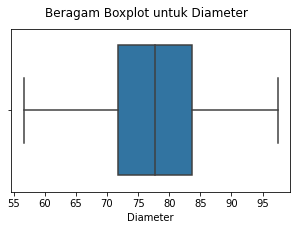

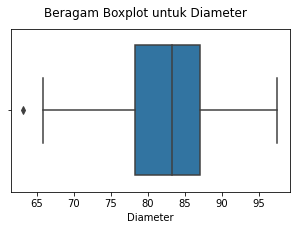

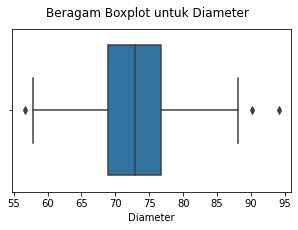

In [50]:
# Boxplot untuk atribut terkait (Diameter: KESELURUHAN)
plt.figure(figsize=(5,3))
sns.boxplot(df['Diameter'])
plt.suptitle('Beragam Boxplot untuk Diameter')
plt.show()

# Boxplot untuk Diameter (250 PERTAMA)
plt.figure(figsize=(5,3))
sns.boxplot(df['Diameter'].iloc[:250])
plt.suptitle('Beragam Boxplot untuk Diameter')
plt.show()

# Boxplot untuk Diameter (250 TERAKHIR)
plt.figure(figsize=(5,3))
sns.boxplot(df['Diameter'].iloc[-250:])
plt.suptitle('Beragam Boxplot untuk Diameter')
plt.show()

In [51]:
# Langkah testing hipotesis:
print("Bagian awal kolom Diameter memiliki variansi yang sama dengan bagian akhirnya?\n")

# 1. Tentukan Hipotesis nol (H0: θ = θ0), dimana θ bisa berupa μ, σ2, p, atau data lain berdistribusi tertentu (normal, binomial, dsc.).
alpha = 0.05; d0 = 0

print(f"H0: σ1^2 - σ2^2 = {d0}")

# 2. Pilih hipotesis alternatif H1 salah dari dari θ > θ0, θ < θ0, atau θ ≠ θ0.
print(f"H1: σ1^2 - σ2^2 ≠ {d0}")

# 3. Tentukan tingkat signifikan α.
print(f"Tingkat signifikan α: {int(alpha*100)}% = {alpha}\n")

# 4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
print("Perhatikan bahwa testing akan berjenis 2 sampel sehingga dapat digunakan dist f-test")
print("Test akan two-sided karena H1 memiliki simbol ' ≠ '\n")

n1 = 250; n2 = 250

one_mean = df['Diameter'].iloc[:n1].mean()
two_mean = df['Diameter'].iloc[-n2:].mean()
one_var = df['Diameter'].iloc[:n1].var()
two_var = df['Diameter'].iloc[-n2:].var()
one_std = df['Diameter'].iloc[:n1].std()
two_std = df['Diameter'].iloc[-n2:].std()

critical_zone_upper = sp.stats.f.ppf(q=1-alpha, dfn=n1-1, dfd=n2-1)
critical_zone_lower = sp.stats.f.ppf(q=alpha, dfn=n1-1, dfd=n2-1)

print(f"Rata-rata 1 = {one_mean}")
print(f"Rata-rata 2 = {two_mean}")
print(f"Standar deviasi 1 = {one_std}")
print(f"Standar deviasi 2 = {two_std}\n")

print(f"Daerah kritis f < {critical_zone_lower} dan f > {critical_zone_upper}\n")

# 5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai denganuji statistik yang digunakan.
f = one_var/two_var
p_value = 1 - sp.stats.f.cdf(f, dfn=n1-1, dfd=n2-1)

print(f"Nilai f-test data = {f}")
print(f"Nilai p-value data = {p_value}\n")

# 6. Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan
print("Berdasarkan pengujian daerah kritis: ")
if (f < critical_zone_lower or f > critical_zone_upper):
  print("Keputusan test hipotesis: ", end="")
  print("H0 ditolak karena nilai uji terletak di daerah kritis sehingga σ1^2 ≠ σ2^2")
else:
  print("Keputusan test hipotesis: ", end="")
  print("H0 tidak berhasil ditolak (H0 diterima) karena nilai uji tidak terletak di daerah kritis sehingga BENAR, σ1^2 = σ2^2")

print("\nBerdasarkan pengujian p-value:")
if (p_value < alpha):
  print("Keputusan test hipotesis: ", end="")
  print("H0 ditolak karena p-value lebih kecil dibanding tingkat signifikansi alpha sehingga σ1^2 ≠ σ2^2")
else:
  print("Keputusan test hipotesis: ", end="")
  print("H0 tidak berhasil ditolak (H0 diterima) karena p-value lebih besar dibanding tingkat signifikansi alpha sehingga BENAR, σ1^2 = σ2^2")

Bagian awal kolom Diameter memiliki variansi yang sama dengan bagian akhirnya?

H0: σ1^2 - σ2^2 = 0
H1: σ1^2 - σ2^2 ≠ 0
Tingkat signifikan α: 5% = 0.05

Perhatikan bahwa testing akan berjenis 2 sampel sehingga dapat digunakan dist f-test
Test akan two-sided karena H1 memiliki simbol ' ≠ '

Rata-rata 1 = 82.61374558964
Rata-rata 2 = 72.928570027
Standar deviasi 1 = 6.570310527389285
Standar deviasi 2 = 6.310963824019057

Daerah kritis f < 0.8114963871039081 dan f > 1.2322913766367205

Nilai f-test data = 1.0838780220421882
Nilai p-value data = 0.26278959201893937

Berdasarkan pengujian daerah kritis: 
Keputusan test hipotesis: H0 tidak berhasil ditolak (H0 diterima) karena nilai uji tidak terletak di daerah kritis sehingga BENAR, σ1^2 = σ2^2

Berdasarkan pengujian p-value:
Keputusan test hipotesis: H0 tidak berhasil ditolak (H0 diterima) karena p-value lebih besar dibanding tingkat signifikansi alpha sehingga BENAR, σ1^2 = σ2^2


## Soal 6
> Test korelasi: tentukan apakah setiap kolom non-target berkorelasi dengan kolom target, dengan menggambarkan juga scatter plot nya. Gunakan correlation test.

#####Nilai korelasi kolom non-target terhadap kolom target

In [53]:
# nilai korelasi masing-masing kolom non-target dengan target (kelas)
pd.DataFrame({ 'corr': df.corrwith(target, method='pearson') }).T

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
corr,-0.602747,-0.713091,-0.152975,-0.730456,-0.607313,-0.602536,0.134344,-0.634861,0.545005,-0.839904


#####Interpretasi korelasi kolom non-target terhadap kolom target

In [54]:
# set degreeFrame sebagai dataframe yang menyimpan nilai korelasi
degreeFrame = pd.DataFrame({ 'degree': df.corrwith(target, method='pearson') }).T

# define helper function
def interpret(x):
  if (abs(float(x)) > 0 and abs(float(x)) <= 0.3):
    return 'weak'
  elif (abs(float(x)) > 0.3 and abs(float(x)) <= 0.5):
    return 'medium'
  else:
    return 'strong'

# change float data type to string
for column in degreeFrame.columns:
  degreeFrame[column] = degreeFrame[column].astype(str)

# redefine degreeFrame dengan menerapkan fungsi
degreeFrame = { 'degree': degreeFrame.apply(interpret) }

# interpretasi korelasi (|x|>0.5 : strong, 0.3<|x|<=0.5 : medium, |x|<=0.3 : weak)
pd.DataFrame(degreeFrame).T

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
degree,strong,strong,weak,strong,strong,strong,weak,strong,strong,strong


#####Visualisasi scatter plot

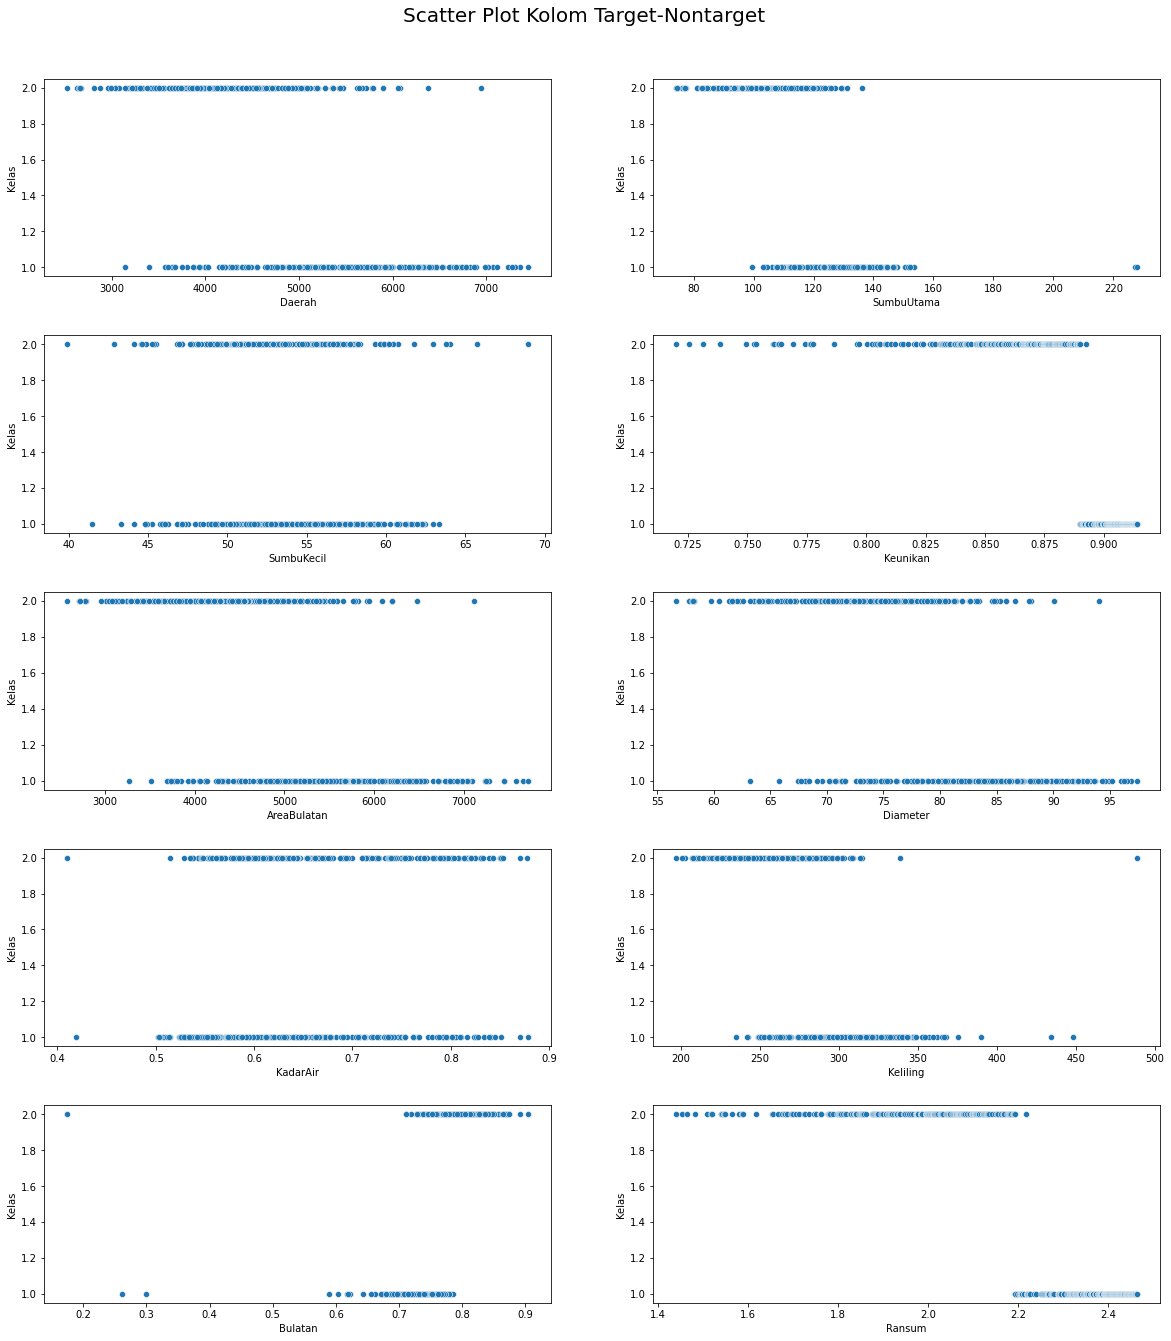

In [55]:
# Visualisasi scatter plot
# Membuat figure dan axis
fig, ax = plt.subplots(figsize=(20,20), ncols=2, nrows=5)

# Mengatur positioning
left   =  0.125
right  =  0.9
bottom =  0.1
top    =  0.95
wspace =  .2
hspace =  .3

plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace,
)

y_title_margin = .2

# Title
plt.suptitle("Scatter Plot Kolom Target-Nontarget", y = 1, fontsize=20)

# Memplot setiap atribut numerik pada kotak tertentu 
sns.scatterplot(data=df_all, x="Daerah", y="Kelas", ax=ax[0][0])
sns.scatterplot(data=df_all, x="SumbuUtama", y="Kelas", ax=ax[0][1])
sns.scatterplot(data=df_all, x="SumbuKecil", y="Kelas", ax=ax[1][0])
sns.scatterplot(data=df_all, x="Keunikan", y="Kelas", ax=ax[1][1])
sns.scatterplot(data=df_all, x="AreaBulatan", y="Kelas", ax=ax[2][0])
sns.scatterplot(data=df_all, x="Diameter", y="Kelas", ax=ax[2][1])
sns.scatterplot(data=df_all, x="KadarAir", y="Kelas", ax=ax[3][0])
sns.scatterplot(data=df_all, x="Keliling", y="Kelas", ax=ax[3][1])
sns.scatterplot(data=df_all, x="Bulatan", y="Kelas", ax=ax[4][0])
sns.scatterplot(data=df_all, x="Ransum", y="Kelas", ax=ax[4][1])

plt.show()